近似差分隐私

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')
import pandas as pd
import numpy as np

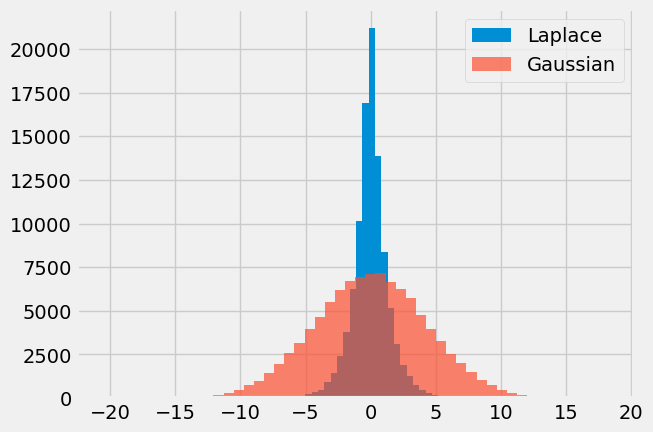

In [2]:
epsilon = 1
vals_laplace = [np.random.laplace(loc=0, scale=1/epsilon) for x in range(100000)]

delta = 10e-5
sigma = np.sqrt(2 * np.log(1.25 / delta)) * 1 / epsilon
vals_gauss = [np.random.normal(loc=0, scale=sigma) for x in range(100000)]

plt.hist(vals_laplace, bins=50, label='Laplace')
plt.hist(vals_gauss, bins=50, alpha=.7, label='Gaussian');
plt.legend();

向量值函数及其敏感度

高级组合性

In [3]:
# 此攻击针对的是敏感度为1的问询
def avg_attack(query, epsilon, k):
    results = [query + np.random.laplace(loc=0, scale=1/epsilon) for i in range(k)]
    return np.mean(results)

avg_attack(10, 1, 500)

9.993192006161637

既然如此，我们应该总是使用高级组合性吗？并非如此。我们分别对于不同的k值计算隐私消耗量，绘制串行组合性和高级组合性的总隐私消耗图

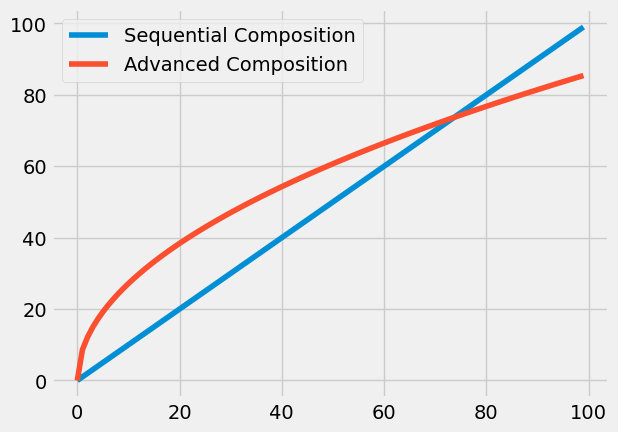

In [4]:
epsilon = 1
delta = 10e-5

def adv_comp(k):
    return 2*epsilon*np.sqrt(2*k*np.log(1/delta))

def seq_comp(k):
    return k*epsilon

plt.plot([seq_comp(k) for k in range(100)], label='Sequential Composition')
plt.plot([adv_comp(k) for k in range(100)], label='Advanced Composition')
plt.legend();

事实证明，当k小于70时，标准的串行组合性比高级组合性得到的总隐私消耗量更小。因此，仅当k比较大时（如大于100时），高级组合性才会有用武之地。不过，当k非常大时，高级组合性可以显露出巨大的优势。

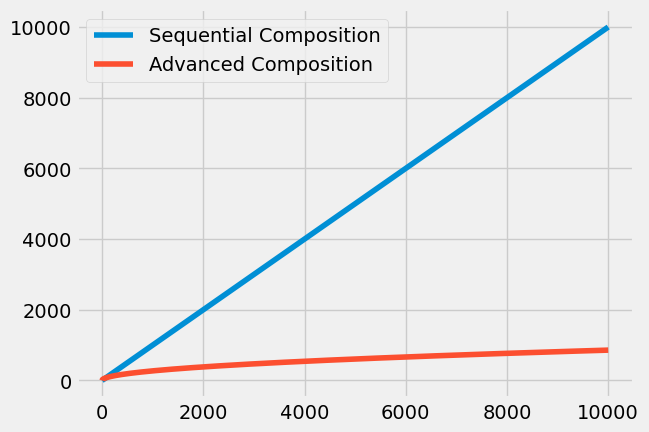

In [5]:
plt.plot([seq_comp(k) for k in range(10000)], label='Sequential Composition')
plt.plot([adv_comp(k) for k in range(10000)], label='Advanced Composition')
plt.legend();